In [1]:
import sys

!pip install --upgrade --user -r req_txt -q
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
!jupyter nbextension enable --py widgetsnbextension

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires Jinja2<3.0,>=2.3, but you have jinja2 3.0.1 which is incompatible.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas_profiling


plt.style.use('classic')
sns.set()
%matplotlib inline

In [3]:
dados_url = "https://dados.seplag.pe.gov.br/apps/basegeral.csv"

In [4]:
#PATH = "/content/drive/MyDrive/github/covid_pe/"

In [5]:
#!wget https://dados.seplag.pe.gov.br/apps/basegeral.csv

In [57]:
df = pd.read_csv(filepath_or_buffer="basegeral.csv", sep=";")

In [60]:
df['dt_notificacao'] = pd.to_datetime(df['dt_notificacao'])
df['dt_obito'] = pd.to_datetime(df['dt_obito'])
df['dt_primeiros_sintomas'] = pd.to_datetime(df['dt_primeiros_sintomas'])
                                                
df['Sexo'] = df['Sexo'].str.upper().astype('category')
df['raca'] = df['raca'].astype('category')
df['classe'] = df['classe'].astype('category')
df['Resultado'] = df['Resultado'].astype('category')
df['hospitalizacao'] = df['hospitalizacao'].replace({'NÃƒO': 'NAO'}).astype('category')
df['evolucao'] = df['evolucao'].astype('category')
df['tipo'] = df['tipo'].astype('category')
df['faixa_etaria'] = df['faixa_etaria'].astype('category')
                                                
df['cd_municipio'] = pd.to_numeric(df['cd_municipio'])

df2 = df

In [61]:
df

,dt_notificacao,Sexo,raca,municipio,dt_primeiros_sintomas,sintomas,comorbidades,hospitalizacao,classe,Resultado,evolucao,dt_obito,cd_municipio,faixa_etaria,tipo
0,2020-04-23,FEMININO,NaN,RECIFE,2020-04-13,FEBRE DOR DE GARGANTA CEFALEIA PERDA DE OLFA...,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaT,261160,20-29 anos,grave
1,2020-04-20,FEMININO,NaN,RECIFE,2020-03-06,DOR DE GARGANTA FEBRE,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaT,261160,30-39 anos,leve
2,2020-04-23,FEMININO,NaN,RECIFE,2020-04-18,DOR DE GARGANTA OUTROS,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaT,261160,60-69 anos,leve
3,2020-04-23,MASCULINO,NaN,RECIFE,2020-04-20,FEBRE TOSSE,NaN,NaN,EM INVESTIGACAO,NaN,NaN,NaT,261160,30-39 anos,leve
4,2020-04-23,FEMININO,NaN,RECIFE,NaT,NaN,NaN,NAO,EM INVESTIGACAO,AGUARDANDO RESULTADO,EM TRATAMENTO DOMICILIAR,NaT,261160,40-49 anos,grave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766053,2021-04-11,FEMININO,PARDA,POCAO,NaT,NaN,DOENCAS CARDIACAS CRONICAS,NaN,NEGATIVO,NEGATIVO,NaN,NaT,261120,30-39 anos,leve
1766054,2021-05-19,MASCULINO,PARDA,POCAO,NaT,NaN,NaN,NaN,NEGATIVO,NEGATIVO,RECUPERADO,NaT,261120,30-39 anos,leve
1766055,2021-04-23,FEMININO,PARDA,POCAO,NaT,NaN,NaN,NaN,NEGATIVO,NEGATIVO,RECUPERADO,NaT,261120,50-59 anos,leve
1766056,2021-02-22,FEMININO,BRANCA,POCAO,NaT,NaN,NaN,NaN,NEGATIVO,NaN,RECUPERADO,NaT,261120,40-49 anos,leve


In [34]:
profile = pandas_profiling.ProfileReport(df, title="COVID-19 - PERNAMBUCO", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
profile.to_file("covid_pe_report.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
df.columns

Index(['dt_notificacao', 'Sexo', 'raca', 'municipio', 'dt_primeiros_sintomas',
       'sintomas', 'comorbidades', 'hospitalizacao', 'classe', 'Resultado',
       'evolucao', 'dt_obito', 'cd_municipio', 'faixa_etaria', 'tipo'],
      dtype='object')

<AxesSubplot:xlabel='mes,ano'>

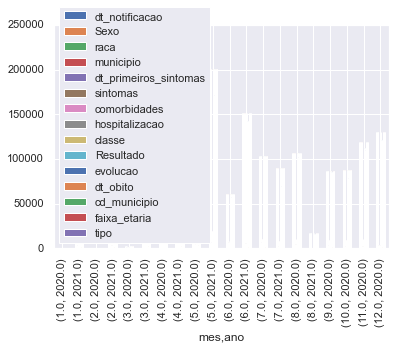

In [65]:
df['ano'] = df['dt_notificacao'].dt.year
df['mes'] = df['dt_notificacao'].dt.month
df.groupby(by=['mes', 'ano']).count().plot(kind="bar")

AttributeError: 'Rectangle' object has no property 'size'

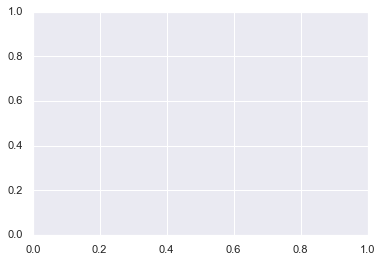

C:\Users\thiag\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\thiag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


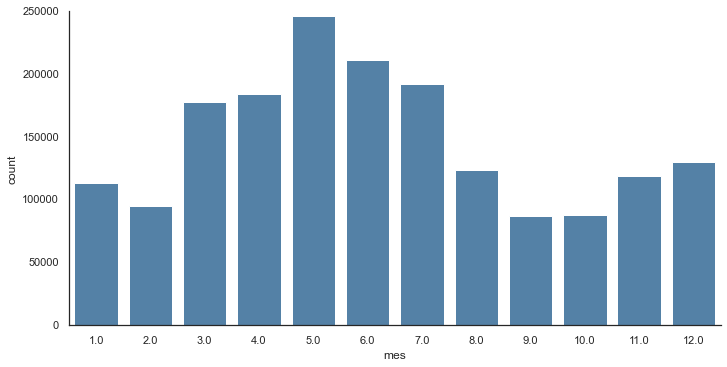

In [67]:
with sns.axes_style('white'):
    g = sns.factorplot("mes", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=1)